In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



<Figure size 10000x10000 with 0 Axes>

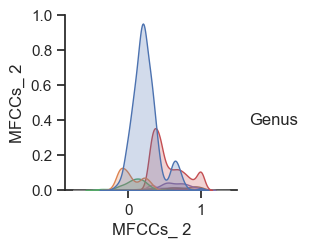

In [24]:
#importing the dataset
dataset = pd.read_csv('Q1Data.csv')
#print(dataset.head())

#checking for null values
#print(dataset.isnull().sum())

#create a dataset that contains only MFCCs_1 AND GENUS name
dataset1 = dataset[['MFCCs_ 1','Genus']]
labels=np.unique(dataset1['Genus'])

#plot the data
#increasing the figure size
# plt.figure(figsize=(100,100))
# sns.set(style="ticks")
# sns.pairplot(dataset1, hue="Genus")
# plt.legend(labels)
# plt.show()

#clearly scinax has a different distribution than the others so scinax can be classified based on MFCCs_1

dataset2 = dataset[['MFCCs_ 2','Genus']]

#plot the data
#increasing the figure size
plt.figure(figsize=(100,100))
sns.set(style="ticks")
sns.pairplot(dataset2, hue="Genus")
#plt.legend(labels)
plt.show()

#leptodactylus has values less than 0.4 and more than 0.2

In [3]:
#creating a decision tree to predict genus using first 6 features

#splitting the dataset into training and test set
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values
#splitting the dataset into training and test set with 20:80 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)




In [29]:
#calculating the gini index for each feature




def gini_index(dataset, feature):

    dataset = dataset.sort_values(by=[feature])
    mean = []
    for i in range(0,7194,2):    
        mean.append((dataset.iloc[i,0]+dataset.iloc[i+1,0])/2)  

    mean = []
    for i in range(0,7194,2):
        mean.append((dataset.iloc[i,0]+dataset.iloc[i+1,0])/2)

    gini = []
    for i in range(0,3596):
        gini.append((mean[i+1]-mean[i])/2)


    gini_class = []
    for i in range(0,3596):
        if gini[i]<=0.4 and gini[i]>=0.2:
            gini_class.append('Leptodactylus')
        else:
            gini_class.append('Scinax')

    gini_accuracy = []
    for i in range(0,3596):
        if gini_class[i]==dataset.iloc[i,6]:
            gini_accuracy.append(1)
    else:
        gini_accuracy.append(0)

    return gini_accuracy

features = ['MFCCs_ 1','MFCCs_ 2','MFCCs_ 3','MFCCs_ 4','MFCCs_ 5','MFCCs_ 6']
gini_accuracy = []
for i in range(0,6):
    gini_accuracy.append(gini_index(dataset,features[i]))

#







[0.]


In [ ]:
#writing a decision tree classifier for adenomera from scratch

#calculating entropy
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

#calculating information gain

def InfoGain(data,split_attribute_name,target_name="Genus"):
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

#calculating the information gain for all the features

